In [104]:
# Imports
import numpy as np
import pandas as pd

import seaborn as sb
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline

In [27]:
adult = pd.read_csv("Downloads/Chrome Downloads/adult.csv")

In [28]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [53]:
adult['workclass'].fillna(adult['workclass'].mode()[0], inplace = True)

In [55]:
#remove missing data
adult.dropna()

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[30162 rows x 15 columns]

In [57]:
# remove all columns with at least 1 missing value
adult.dropna(axis = 1)

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status   relationship   race     sex  capital-gain  \
0           Never-married  Not-in-family  White    Male          2174   
1      Married-civ-spouse        Husband  White    Male             0   
2                Divorced  Not-in-family  White    Male             0   
3      Married-civ-spouse        Husband  Black    Male             0   
4      Married-civ-spouse           Wife  Black  Female             0   
...                   ...            ...    ...     ...           ...   
32556  Married-civ-spouse           Wife  White  Female             0   
32557  Married-civ-spouse        Husband  White    Male             0   
32558             Widowed      Unmarried  White  Female             0   
32559       Never-married      Own-child  White    Male             0   
32560  Married-civ-spouse           Wife  White  Female         15024   

       capital-loss  hours-per-week income  
0                 0              40  <=50K  
1                 0              13  <=50K  
2                 0              40  <=50K  
3                 0              40  <=50K  
4                 0              40  <=50K  
...             ...             ...    ...  
32556             0              38  <=50K  
32557             0              40   >50K  
32558             0              40  <=50K  
32559             0              20  <=50K  
32560             0              40   >50K  

[32561 rows x 13 columns]

# calcuate chi-square stats to see if there is a correlation between education & income

In [59]:
# contingency table

contingency = pd.crosstab(adult['education'], adult ['income'])
contingency

income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387

In [61]:
#calculate chi-square
c, p, dof, expected = chi2_contingency(contingency)
print(p) # if p is less than 0.05 this suggests the two attributes are correlated

0.0


# Pearson's correlation

In [63]:
# correlation between all pairs of numerical attributes
adult1 = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]

pearsonscorr = adult1.corr(method = 'pearson')
pearsonscorr

age    fnlwgt  education-num  capital-gain  capital-loss
age            1.000000 -0.076646       0.036527      0.077674      0.057775
fnlwgt        -0.076646  1.000000      -0.043195      0.000432     -0.010252
education-num  0.036527 -0.043195       1.000000      0.122630      0.079923
capital-gain   0.077674  0.000432       0.122630      1.000000     -0.031615
capital-loss   0.057775 -0.010252       0.079923     -0.031615      1.000000

<Axes: >

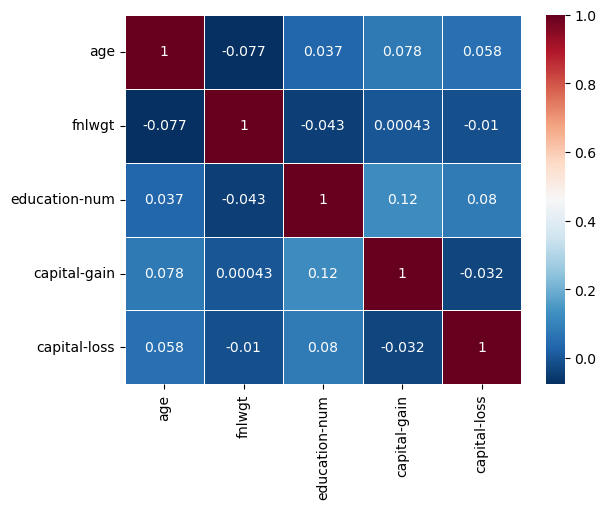

In [69]:
# visualise it

sb.heatmap(pearsonscorr, xticklabels = pearsonscorr.columns, yticklabels = pearsonscorr.columns, cmap = 'RdBu_r', annot = True, linewidth = 0.5)

In [ ]:
del adult['fnlwgt']

In [77]:
adult.head()

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [79]:
adult['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [81]:
adult = adult.replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Government-employee')
adult['workclass'].value_counts()

workclass
Private                24532
Government-employee     4351
Self-emp-not-inc        2541
Self-emp-inc            1116
Without-pay               14
Never-worked               7
Name: count, dtype: int64

In [83]:
adult['age_1'] = pd.qcut(adult['age'], q = 4)
adult['age_1'].value_counts()

age_1
(16.999, 28.0]    8898
(37.0, 48.0]      8241
(28.0, 37.0]      7783
(48.0, 90.0]      7639
Name: count, dtype: int64

In [85]:
adult['age_2'] = pd.cut(adult['age'], bins = 4)

In [87]:
adult['age_2'].value_counts()

age_2
(16.927, 35.25]    14925
(35.25, 53.5]      12713
(53.5, 71.75]       4455
(71.75, 90.0]        468
Name: count, dtype: int64

# Transform categorical attribute to numerical

In [91]:
LE = LabelEncoder()
adult['workclass'] = LE.fit_transform(adult['workclass'])

In [93]:
adult['workclass'].value_counts()

workclass
2    24532
0     4351
4     2541
3     1116
5       14
1        7
Name: count, dtype: int64

In [108]:
min_max_scaler = preprocessing.MinMaxScaler()

#for one numerical value
adult[['age']] = min_max_scaler.fit_transform(adult[['age']])

#for all numerical variables
adult[['age', 'workclass', 'education-num ', 'capital-gain', 'capital-loss', 'hours-per-week']]=\
min_max_scaler.fit_transform(adult[['age', 'workclass', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

adult.describe()

age     workclass  education-num  capital-gain  capital-loss  \
count  32561.000000  32561.000000   32561.000000  32561.000000  32561.000000   
mean       0.295639      0.384835      10.080679      0.010777      0.020042   
std        0.186855      0.187541       2.572720      0.073854      0.092507   
min        0.000000      0.000000       1.000000      0.000000      0.000000   
25%        0.150685      0.400000       9.000000      0.000000      0.000000   
50%        0.273973      0.400000      10.000000      0.000000      0.000000   
75%        0.424658      0.400000      12.000000      0.000000      0.000000   
max        1.000000      1.000000      16.000000      1.000000      1.000000   

       hours-per-week  education-num   
count    32561.000000    32561.000000  
mean         0.402423        0.605379  
std          0.125994        0.171515  
min          0.000000        0.000000  
25%          0.397959        0.533333  
50%          0.397959        0.600000  
75%          0.448980        0.733333  
max          1.000000        1.000000

# SELECT SUBSET OF DATA ##USEFUL FOR COURSEWORK DUE TO PROCESSING POWER

In [112]:
adult_sample = adult.sample(frac = 0.5, replace = False, random_state = 1)
adult.shape

(32561, 17)

In [120]:
#example on income attribute
adult_sample1 =  adult.groupby('income', group_keys = False).apply(lambda x: x.sample(frac=0.5))
adult_sample1.shape

C:\Users\up2066541\AppData\Local\Temp\ipykernel_7116\3997706903.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adult_sample1 =  adult.groupby('income', group_keys = False).apply(lambda x: x.sample(frac=0.5))


(16280, 17)

In [122]:
adult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [124]:
adult_sample1['income'].value_counts()

income
<=50K    12360
>50K      3920
Name: count, dtype: int64